<a href="https://colab.research.google.com/github/whynotkush/SMAI/blob/main/Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Implementing a Siamese network on MNIST Dataset </center></h1>

Install tensorflow addons

In [ ]:
!pip3 install -q -U tensorflow-addons

     |████████████████████████████████| 706kB 7.3MB/s 


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , Flatten
from tensorflow.keras.layers import Conv2D, Activation,AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Lambda
import numpy as np
import random
from matplotlib import pyplot

In [ ]:
# define dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
y_train.shape , y_test.shape

((60000, 1), (10000, 1))

In [ ]:
input_shape = (28, 28, 1)

Plotting sample image

In [ ]:
from matplotlib import pyplot as plt
def plot_sample(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.axis('off')
    plt.title('label : '+str(y[index][0]))

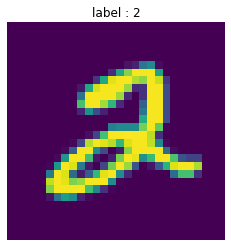

In [ ]:
plot_sample(x_train.reshape(60000,28,28) , y_train , 5)

In [ ]:
from __future__ import absolute_import
from __future__ import print_function
from keras import backend as K
 
num_classes = 10
epochs = 10

def create_pairs(x, digit_indices):
  pairs = []
  labels = []
   
  n=min([len(digit_indices[d]) for d in range(num_classes)]) -1
   
  for d in range(num_classes):
    for i in range(n):
      z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
      x1_ = x[z1]
      x2_ = x[z2]
      pairs += [[x1_, x2_]]
      inc = random.randrange(1, num_classes)
      dn = (d + inc) % num_classes
      z1, z2 = digit_indices[d][i], digit_indices[dn][i]
      pairs += [[x1_,x2_]]
      labels += [1,0]
  return np.array(pairs), np.array(labels)
 
 
def create_base_net(input_shape):
   
  input = Input(shape = input_shape)
  
  x = Conv2D(4, (3,3), activation = 'tanh')(input)
  x = AveragePooling2D(pool_size = (2,2))(x)
  x = Dropout(0.5)(x)

  x = Conv2D(8, (3,3), activation = 'tanh')(x)
  x = AveragePooling2D(pool_size = (2,2))(x)
  
  x = Flatten()(x)
  x = Dense(10, activation = 'tanh')(x)
  
  model = Model(input, x)
  
  model.summary()
  return model

In [ ]:
# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]
tr_pairs, tr_y = create_pairs(x_train, digit_indices)
 
digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(x_test, digit_indices)
 
# network definition
base_network = create_base_net(input_shape)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
average_pooling2d_8 (Average (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 200)               0  

Euclidean Distance

In [ ]:
def euclid_dis(vects):
  x,y = vects
  sum_square = K.sum(K.square(x-y), axis=1, keepdims=True)
  eps = K.epsilon()
  max_ = K.maximum(sum_square)
  return K.sqrt( max_, eps )

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    shp_ = shape1[0]
    return (shp_ , 1)

### Contrastive Loss

In [ ]:
model = Model([input_a, input_b], distance)
#train
model.compile(loss=contrastive_loss, optimizer='adam', metrics=[accuracy])
history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

Epoch 1/10
847/847 [==============================] - 43s 51ms/step - loss: 0.2182 - accuracy: 0.6830 - val_loss: 0.1236 - val_accuracy: 0.8515
Epoch 2/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1500 - accuracy: 0.8067 - val_loss: 0.1123 - val_accuracy: 0.8702
Epoch 3/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1339 - accuracy: 0.8374 - val_loss: 0.1032 - val_accuracy: 0.8809
Epoch 4/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1263 - accuracy: 0.8490 - val_loss: 0.0994 - val_accuracy: 0.8864
Epoch 5/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1241 - accuracy: 0.8521 - val_loss: 0.0976 - val_accuracy: 0.8897
Epoch 6/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1223 - accuracy: 0.8559 - val_loss: 0.0973 - val_accuracy: 0.8919
Epoch 7/10
847/847 [==============================] - 43s 51ms/step - loss: 0.1207 - accuracy: 0.8565 - val_loss: 0.0975 - val_accuracy:

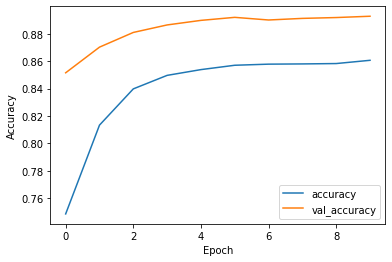

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

Accuracy

In [ ]:
def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
Acc = compute_accuracy(y_test, y_pred)

### Triplet Loss Function

In [ ]:
model = Model([input_a, input_b], distance)
#train
loss_=tfa.losses.TripletSemiHardLoss()
model.compile(loss=loss_, optimizer='SGD', metrics=[accuracy])

history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

Epoch 1/10
847/847 [==============================] - 80s 92ms/step - loss: 0.9855 - accuracy: 0.5010 - val_loss: 0.9148 - val_accuracy: 0.5625
Epoch 2/10
847/847 [==============================] - 78s 92ms/step - loss: 0.9591 - accuracy: 0.5008 - val_loss: 0.8132 - val_accuracy: 0.5718
Epoch 3/10
847/847 [==============================] - 78s 93ms/step - loss: 0.9175 - accuracy: 0.5175 - val_loss: 0.7629 - val_accuracy: 0.5909
Epoch 4/10
847/847 [==============================] - 79s 93ms/step - loss: 0.8947 - accuracy: 0.5325 - val_loss: 0.7433 - val_accuracy: 0.6053
Epoch 5/10
847/847 [==============================] - 79s 94ms/step - loss: 0.8780 - accuracy: 0.5410 - val_loss: 0.7321 - val_accuracy: 0.6084
Epoch 6/10
847/847 [==============================] - 79s 93ms/step - loss: 0.8725 - accuracy: 0.5484 - val_loss: 0.7220 - val_accuracy: 0.6189
Epoch 7/10
847/847 [==============================] - 79s 93ms/step - loss: 0.8653 - accuracy: 0.5518 - val_loss: 0.7197 - val_accuracy:

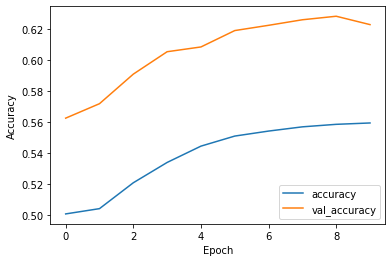

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Regularized Binary Crossentropy

In [ ]:
import tensorflow_addons as tfa
from tensorflow.keras import regularizers

def Regularied_siam(input_shape):
   
  input = Input(shape = input_shape)
  
  x = Conv2D(4, (3,3), activation = 'tanh' , kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(input)
  x = AveragePooling2D(pool_size = (2,2))(x)
  x = Dropout(0.5)(x)
  
  x = Conv2D(8, (3,3), activation = 'tanh' , kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
  x = AveragePooling2D(pool_size = (2,2))(x)

  x = Flatten()(x)
  x = Dense(10, activation = 'tanh' )(x)
  
  model = Model(input, x)
  
  model.summary()
  return model

base_network = Regularied_siam(input_shape)

model = Model([input_a, input_b], distance)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 4)         40        
_________________________________________________________________
average_pooling2d_12 (Averag (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 200)               0  

In [ ]:
#train
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

Epoch 1/10
1875/1875 [==============================] - 281s 149ms/step - loss: 0.3362 - accuracy: 0.8723 - val_loss: 0.2920 - val_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 279s 149ms/step - loss: 0.3039 - accuracy: 0.8836 - val_loss: 0.2944 - val_accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.2829 - accuracy: 0.8907 - val_loss: 0.2909 - val_accuracy: 0.9003
Epoch 4/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.2811 - accuracy: 0.8907 - val_loss: 0.2982 - val_accuracy: 0.8999
Epoch 5/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.2755 - accuracy: 0.8914 - val_loss: 0.3026 - val_accuracy: 0.8977
Epoch 6/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.2770 - accuracy: 0.8915 - val_loss: 0.2936 - val_accuracy: 0.9012
Epoch 7/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.2725 - accuracy: 0.8926 - val_

(0.85, 0.95)

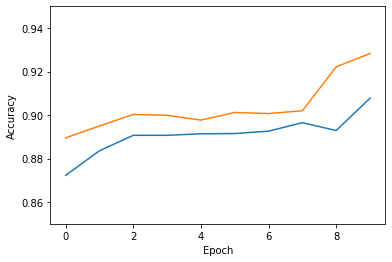

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

In [ ]:
def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
Acc = compute_accuracy(y_test, y_pred)

Predicting label for test image 5

In [ ]:
plot_sample(X_test, y_pred, 2)

As we can see above , Adam optimizer is giving the best results.

### Pros and Cons of Siamese Networks

### Pros : 

##### CAN BE MORE ROBUST TO EXTREME CLASS IMBALANCE :

  With the aid of One-shot learning, given a few images per class is sufficient for Siamese Networks to recognize those images in the future .


##### CAN BE GOOD TO ENSEMBLE WITH A CLASSIFIER :

Given that its learning mechanism is somewhat different from Classification, simple averaging of it with a Classifier can do much better than average 2 correlated Supervised models (e.g. GBM & RF classifier)


##### CAN YIELD BETTER EMBEDDINGS :

Siamese focuses on learning embeddings (in the deeper layer) that place the same classes/concepts close together. Hence, can learn semantic similarity.

### Cons :
##### NEEDS MORE TRAINING TIME THAN NORMAL NETWORKS :

Since Siamese Networks involves quadratic pairs to learn from (to see all information available) it is slower than normal classification type of learning(pointwise learning)

##### DOESN'T OUTPUT PROBABILITIES :

Since training involves pairwise learning, it won’t output the probabilities of the prediction, but the distance from each class